### INSTALL REQUIRED LIBRARIES AND PACKAGES

In [36]:

import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


### EXTRACT ALL THE NECESSARY DATA

#### EXTRACTING HIGHEST_INCLUSIVE_GROWTH RAW DATA

In [37]:

#Import Highest IGS Score Files
highest_excel_files = glob.glob('DATA/RAW/HIGHEST_GROWTH_RATE/*.xlsx')  # Update the path as needed

# Step 2: Initialize a list to store DataFrames
highest_dataframes = []

# Step 3: Loop through each Excel file
for i, file in enumerate(highest_excel_files):
    # Read the second sheet (index 1) and use the second row (index 1) as headers
    highest_df = pd.read_excel(file, sheet_name=1, header=1)  # Use the second row as header

    # If it's the first file, we will include the headers from it
    if i == 0:
        # Store headers from the first file for later use
        headers = highest_df.columns.tolist()
    else:
        # Filter columns to keep only those that match the first file's headers
        highest_df = highest_df[headers]  # Retain only columns that are in the headers list 


#### EXTRACTING LOWEST_INCLUSIVE_GROWTH RAW DATA

In [38]:
#Import LOWEST IGS Score Files
lowest_excel_files = glob.glob('DATA/RAW/LOWEST_GROWTH_RATE/*.xlsx')  # Update the path as needed

# Step 2: Initialize a list to store DataFrames
lowest_dataframes = []

# Step 3: Loop through each Excel file
for i, file in enumerate(lowest_excel_files):
    # Read the second sheet (index 1) and use the second row (index 1) as headers
    lowest_df = pd.read_excel(file, sheet_name=1, header=1)  # Use the second row as header

    # If it's the first file, we will include the headers from it
    if i == 0:
        # Store headers from the first file for later use
        headers = lowest_df.columns.tolist()
    else:
        # Filter columns to keep only those that match the first file's headers
        lowest_df = lowest_df[headers]  # Retain only columns that are in the headers list 


#### Append the DataFrames to the list

In [39]:

highest_dataframes.append(highest_df) #Highest_inclusive_growth rate

lowest_dataframes.append(lowest_df) #lowest_inclusive_growth rate

In [40]:

# Step 4: Concatenate all DataFrames into a single DataFrame
highest_combined_data = pd.concat(highest_dataframes, ignore_index=True)
lowest_combined_data = pd.concat(lowest_dataframes, ignore_index=True)

In [46]:
print(lowest_combined_data)

   Is an Opportunity Zone  Census Tract FIPS code             County  \
0                     NaN            4.610301e+10  Pennington County   
1                     NaN            4.610301e+10  Pennington County   
2                     NaN            4.610301e+10  Pennington County   
3                     NaN            4.610301e+10  Pennington County   
4                     NaN            4.610301e+10  Pennington County   
5                     NaN            4.610301e+10  Pennington County   
6                     NaN            4.610301e+10  Pennington County   

          State    Year  Inclusive Growth Score  Growth  Inclusion  Place  \
0  South Dakota  2017.0                    68.0    71.0       66.0   70.0   
1  South Dakota  2018.0                    64.0    63.0       65.0   70.0   
2  South Dakota  2019.0                    66.0    68.0       65.0   69.0   
3  South Dakota  2020.0                    65.0    61.0       69.0   70.0   
4  South Dakota  2021.0               

### DATA CLEANING

In [42]:

# Step 5: Remove rows with NaN values in the first column
highest_combined_data = highest_combined_data.dropna(subset=[highest_combined_data.columns[0]])

# Step 6: Set the first column as the primary key (index) and keep the existing index
highest_combined_data.set_index(highest_combined_data.columns[0], inplace=True)

# Step 7: Create a new index that continues from the last index
highest_combined_data.index = range(len(highest_combined_data))



In [43]:

# Step 5: Remove rows with NaN values in the first column
lowest_combined_data = lowest_combined_data.dropna(subset=[lowest_combined_data.columns[0]])

# Step 6: Set the first column as the primary key (index) and keep the existing index
lowest_combined_data.set_index(lowest_combined_data.columns[0], inplace=True)

# Step 7: Create a new index that continues from the last index
lowest_combined_data.index = range(len(lowest_combined_data))



In [44]:
# Step 8: Write the combined DataFrame to a new Excel file
highest_combined_data.to_excel('DATA/PROCESSED/HIGHEST_INCLUSIVE_GROWTH.xlsx')
lowest_combined_data.to_excel('DATA/PROCESSED/LOWEST_INCLUSIVE_GROWTH.xlsx')

# Print the 'Growth' column to verify
print(highest_combined_data)


   Is an Opportunity Zone  Census Tract FIPS code            County     State  \
0                     NaN            2.918922e+10  St. Louis County  Missouri   
1                     NaN            2.918922e+10  St. Louis County  Missouri   
2                     NaN            2.918922e+10  St. Louis County  Missouri   
3                     NaN            2.918922e+10  St. Louis County  Missouri   
4                     NaN            2.918922e+10  St. Louis County  Missouri   
5                     NaN            2.918922e+10  St. Louis County  Missouri   
6                     NaN            2.918922e+10  St. Louis County  Missouri   

     Year  Inclusive Growth Score  Growth  Inclusion  Place  Place Growth  \
0  2017.0                    75.0    65.0       85.0   78.0          73.0   
1  2018.0                    76.0    67.0       85.0   82.0          80.0   
2  2019.0                    74.0    62.0       85.0   77.0          70.0   
3  2020.0                    72.0    59.0  

In [47]:
highest_averages = highest_combined_data.mean(numeric_only=True)
lowest_averages = lowest_combined_data.mean(numeric_only=True)


highest_average_hashmap = {key: round(value, 2) for key, value in highest_averages.items()}
lowest_average_hashmap = {key: round(value, 2) for key, value in lowest_averages.items()}
print(highest_average_hashmap)
print(lowest_average_hashmap)



{'Is an Opportunity Zone': nan, 'Census Tract FIPS code': 29189221421.0, 'Year': 2020.0, 'Inclusive Growth Score': 73.0, 'Growth': 61.71, 'Inclusion': 84.0, 'Place': 75.0, 'Place Growth': 65.29, 'Place Inclusion': 85.0, 'Net Occupancy Score': 65.86, 'Net Occupancy Base, %': 0.96, 'Net Occupancy Tract, %': 1.59, 'Residential Real Estate Value Score': 64.57, 'Residential Real Estate Value Base, %': 21.83, 'Residential Real Estate Value Tract, %': 22.26, 'Acres of Park Land Score': 97.0, 'Acres of Park Land Base, %': 4.1, 'Acres of Park Land Tract, %': 31.6, 'Affordable Housing Score': 98.14, 'Affordable Housing Base, %': 72.41, 'Affordable Housing Tract, %': 88.67, 'Internet Access Score': 93.57, 'Internet Access Base, %': 86.57, 'Internet Access Tract, %': 97.26, 'Travel Time to Work Score': 52.0, 'Travel Time to Work Base, %': 56.5, 'Travel Time to Work Tract, %': 57.34, 'Economy': 65.71, 'Economy Growth': 57.14, 'Economy Inclusion': 74.43, 'New Businesses Score': 64.0, 'New Businesses

## DATA VISUALIZATION


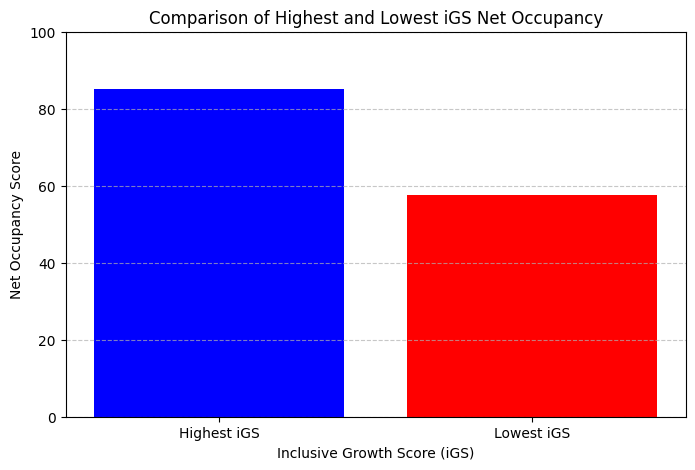

In [49]:
# Extracting the scores for plotting
x_labels = ['Highest iGS', 'Lowest iGS']
net_occupancy = [
    highest_average_hashmap['Place Inclusion'],
    lowest_average_hashmap['Place Inclusion']
]

# Creating the plot
plt.figure(figsize=(8, 5))
plt.bar(x_labels, net_occupancy, color=['blue', 'red'])
plt.title('Comparison of Highest and Lowest iGS Net Occupancy')
plt.xlabel('Inclusive Growth Score (iGS)')
plt.ylabel('Net Occupancy Score')
plt.ylim(0, 100)  # Adjust this according to the range of your data
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()